In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import joblib


In [2]:
df = pd.read_csv("C:/DoAn/movies_clustered.csv")
df.head()


,ï»¿imdbID,Title,Year,Genre,Director,Actors,Plot,imdbRating,imdbVotes,Poster,...,Released,Runtime,Writer,Language,Country,Awards,Ratings,Metascore,Type,Cluster
0,tt0436339,G-Force,2009,"Animation, Action, Adventure",Hoyt Yeatman,"Will Arnett, PenÃ©lope Cruz, Zach Galifianakis",The story is about a team of trained secret ag...,5.1,"52,843",https://m.media-amazon.com/images/M/MV5BMTM4NT...,...,24 Jul 2009,88 min,"Cormac Wibberley, Marianne Wibberley, Hoyt Yea...","English, Spanish",United States,1 win & 1 nomination total,"[{'Source': 'Internet Movie Database', 'Value'...",41.0,movie,3
1,tt3548028,Aardvark,2017,Drama,Brian Shoaf,"Zachary Quinto, Jenny Slate, Sheila Vand",Emily Milburton is a therapist who is struggli...,4.5,636,https://m.media-amazon.com/images/M/MV5BMzQyNz...,...,13 Apr 2018,89 min,Brian Shoaf,English,United States,1 nomination total,"[{'Source': 'Internet Movie Database', 'Value'...",37.0,movie,0
2,tt0329355,Marion Bridge,2002,Drama,Wiebke von Carolsfeld,"Molly Parker, Rebecca Jenkins, Stacy Smith",Agnes returns to her hometown in Nova Scotia t...,6.7,"1,438",https://m.media-amazon.com/images/M/MV5BYzhkYT...,...,18 Apr 2003,90 min,Daniel MacIvor,English,Canada,6 wins & 8 nominations,"[{'Source': 'Internet Movie Database', 'Value'...",71.0,movie,4
3,tt1258120,Army of Crime,2009,"Drama, History, War",Robert GuÃ©diguian,"Simon Abkarian, Virginie Ledoyen, Robinson StÃ...",The poet Missak Manouchian leads a mixed bag o...,6.7,"3,616",https://m.media-amazon.com/images/M/MV5BMjI0Nj...,...,20 Aug 2010,139 min,"Serge Le PÃ©ron, Robert GuÃ©diguian, Gilles Ta...","French, German",France,4 wins & 1 nomination,"[{'Source': 'Internet Movie Database', 'Value'...",76.0,movie,2
4,tt0329485,The Butterfly,2002,"Adventure, Comedy, Drama",Philippe Muyl,"Michel Serrault, Claire Bouanich, Nade Dieu",This is the story of a young girl named Elsa w...,7.1,"3,485",https://m.media-amazon.com/images/M/MV5BNDc3Nz...,...,18 Dec 2002,85 min,Philippe Muyl,French,France,1 win total,"[{'Source': 'Internet Movie Database', 'Value'...",64.0,movie,1


In [3]:
df = df[['Plot', 'Cluster']]
df = df.dropna()

df['Cluster'].value_counts()


Cluster
2    109
1    103
4     78
3     64
0     22
Name: count, dtype: int64

In [4]:
X_text = df['Plot']
y = df['Cluster']

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train_text.shape, X_test_text.shape


((300,), (76,))

In [5]:
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=3000,
    ngram_range=(1, 2)
)

X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

X_train.shape, X_test.shape


((300, 3000), (76, 3000))

In [ ]:
model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

model.fit(X_train, y_train)


c:\Users\ADMIN\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [10]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.5131578947368421

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.50      0.81      0.62        21
           2       0.42      0.64      0.51        22
           3       1.00      0.46      0.63        13
           4       0.50      0.06      0.11        16

    accuracy                           0.51        76
   macro avg       0.68      0.44      0.45        76
weighted avg       0.59      0.51      0.47        76



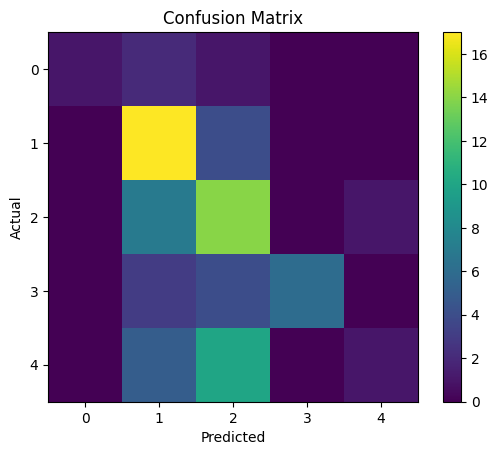

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()


In [13]:
import os

os.makedirs("model", exist_ok=True)

import joblib
joblib.dump(model, "model/movie_classifier.pkl")
joblib.dump(tfidf, "model/tfidf_vectorizer.pkl")

print("Saved model & vectorizer")


Saved model & vectorizer


In [14]:
test_result = X_test_text.reset_index(drop=True).to_frame()
test_result['Actual_Cluster'] = y_test.reset_index(drop=True)
test_result['Predicted_Cluster'] = y_pred

test_result.to_csv(
    "C:/DoAn/classification_test_result.csv",
    index=False,
    encoding="utf-8-sig"
)

test_result.head()


,Plot,Actual_Cluster,Predicted_Cluster
0,"A young lawyer, Richard Goodwin, investigates ...",0,2
1,"Story follows Sophia, who is severely depresse...",4,4
2,"In the US, a child goes missing every 40 secon...",1,1
3,A strange woman comes to Texas to meet her hal...,2,2
4,When Henry DeTamble meets Clare Abshire in a C...,4,1


Mô hình Logistic Regression được sử dụng để phân lớp phim dựa trên nội dung Plot.
Dữ liệu được biểu diễn bằng phương pháp TF-IDF.
Nhãn phân lớp là Cluster được sinh ra từ bước phân cụm KMeans.
Kết quả cho thấy mô hình đạt độ chính xác khoảng XX%.
